# Finding the fractal dimension of a 2D object 
### By: Christian Palma - Joel Maldonado

In [208]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import math as math
from pylab import *
import time
import pandas as pd

## Part 1: Binarizing the image



In order to achieve this goal, we need to upload a preprocessed image in which the object that
is going to be analyzed is located on a semi-homogeneus background with a colour distinct of the object. 


As an example, consider the following image of a ecuadorian water dam.

We are using the Python Imaging Library (PIL) to read it

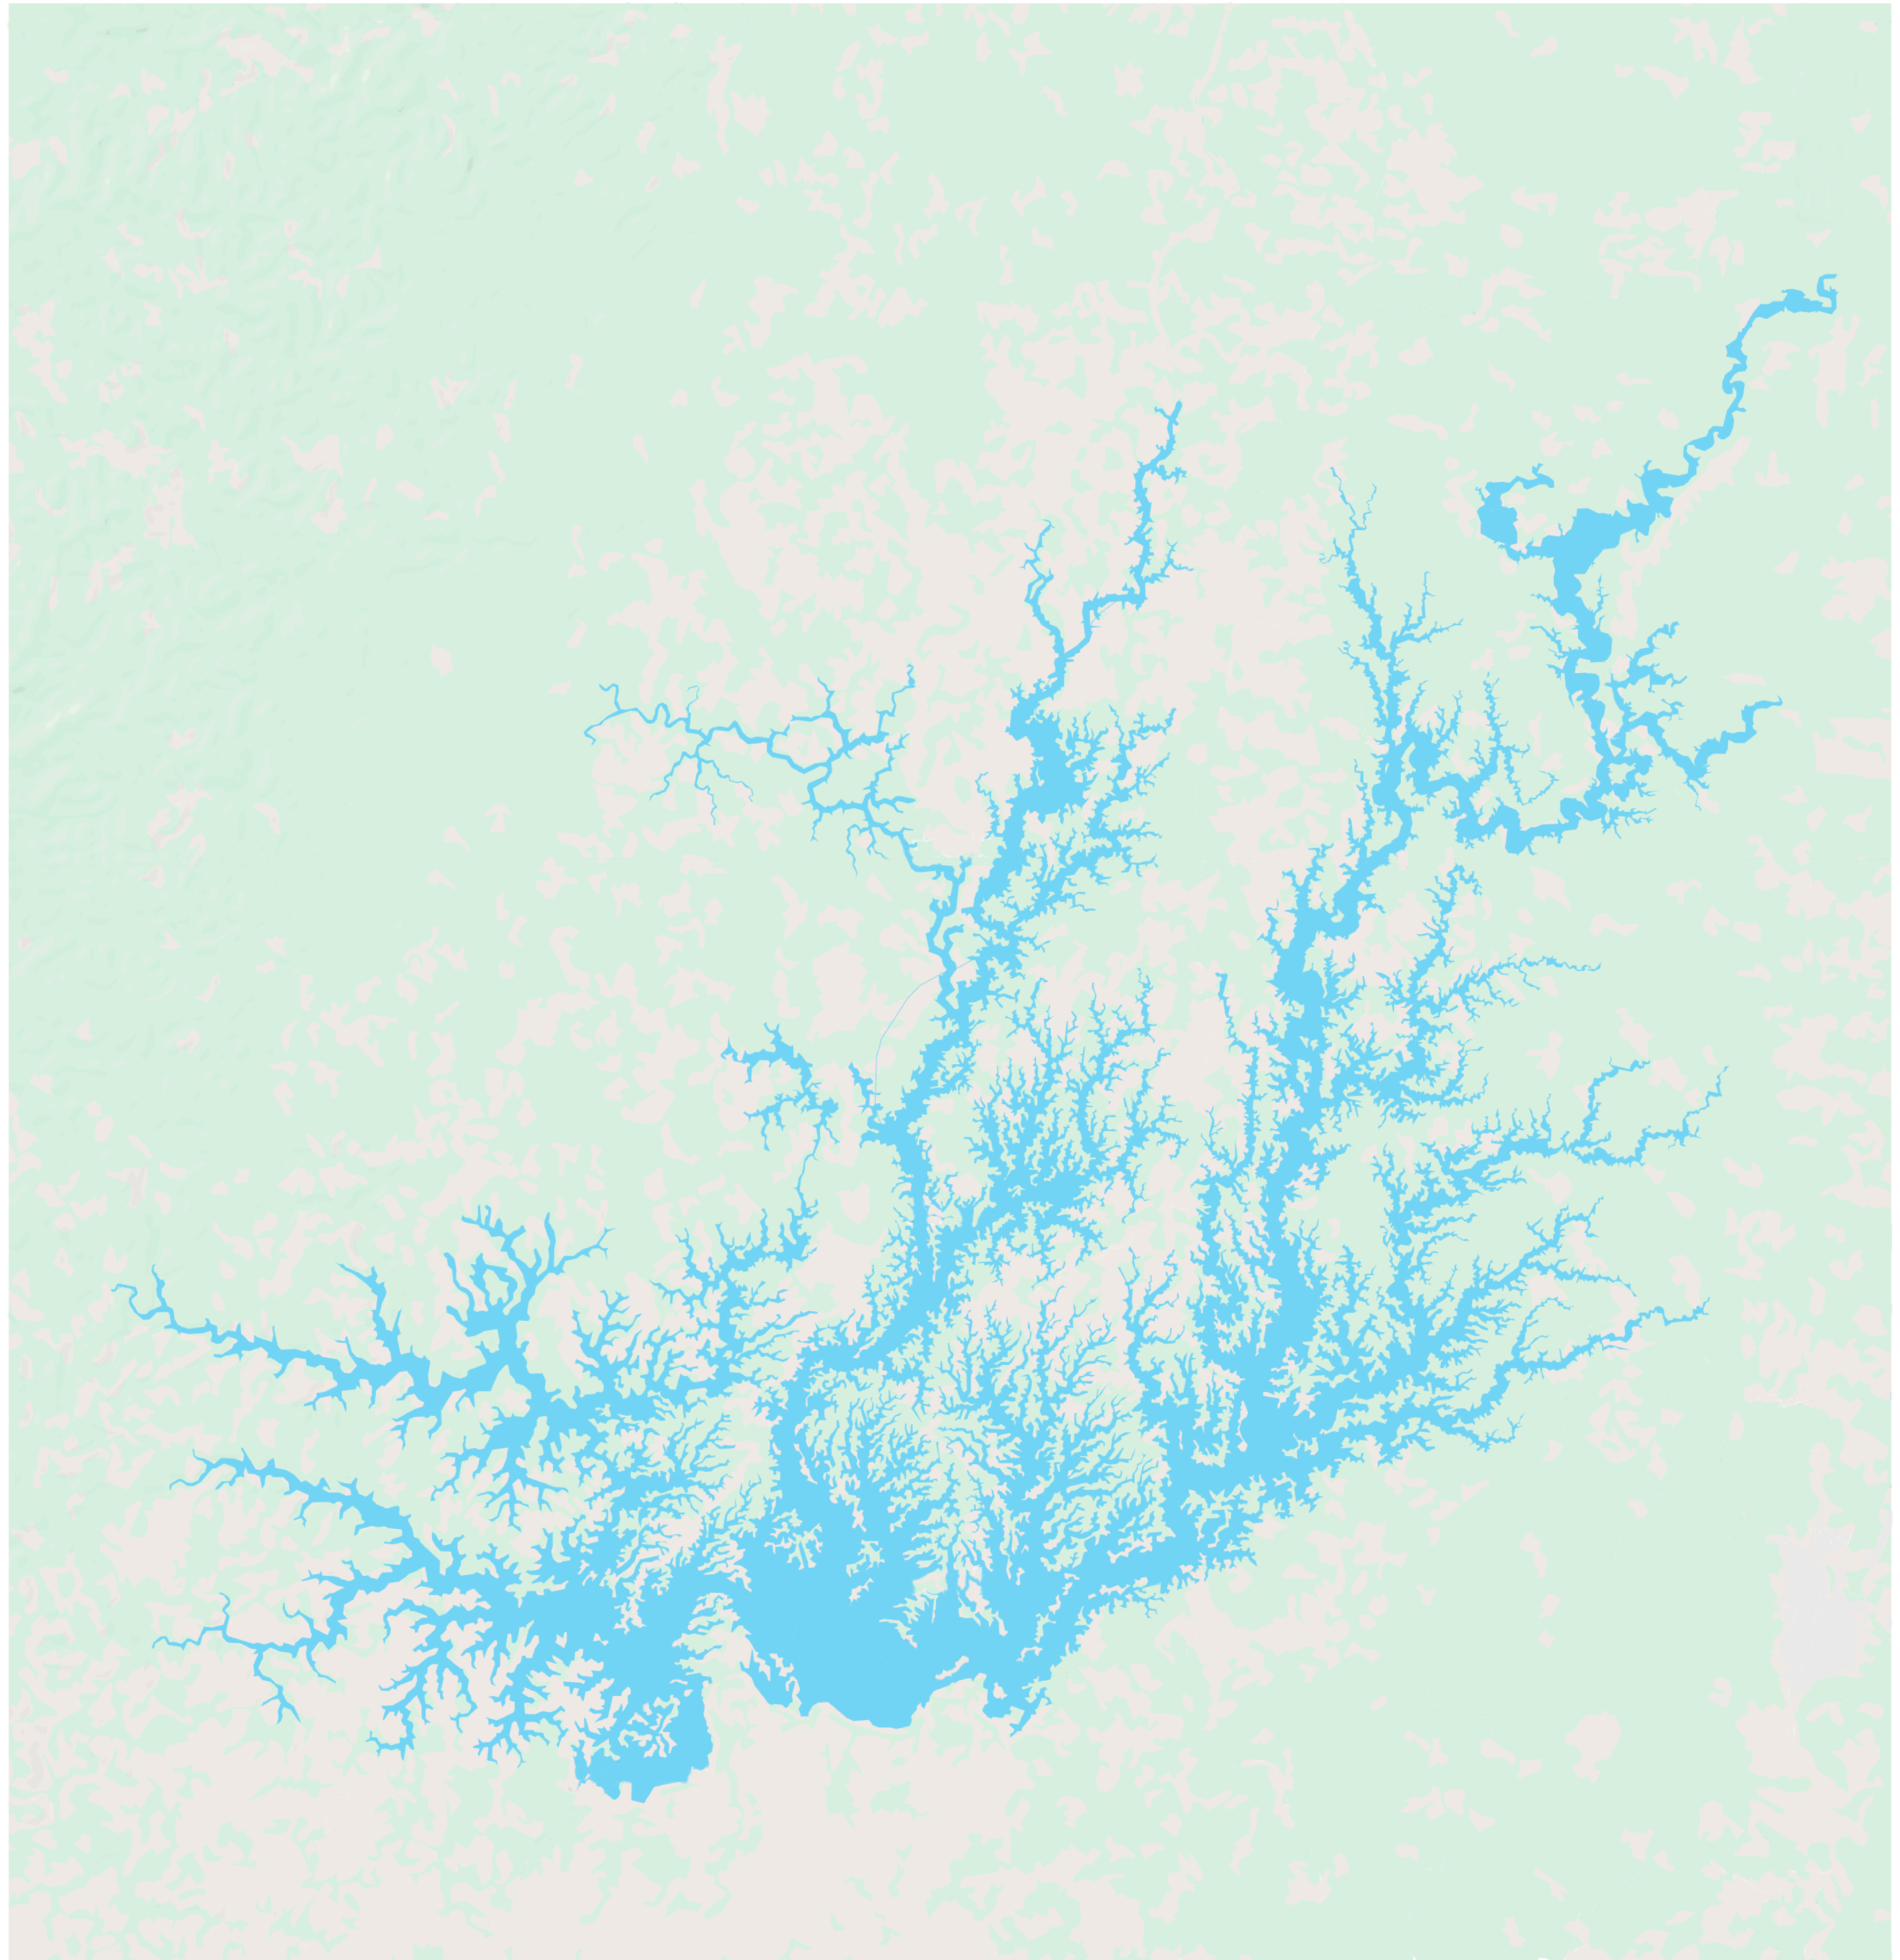

In [100]:
Image.open('jou.png')

Evidently, the light blue section is the water dam. So, let's see what happens if we use one of the main functions of the Python Imaging Libray (PILL), the .convert attribute. 

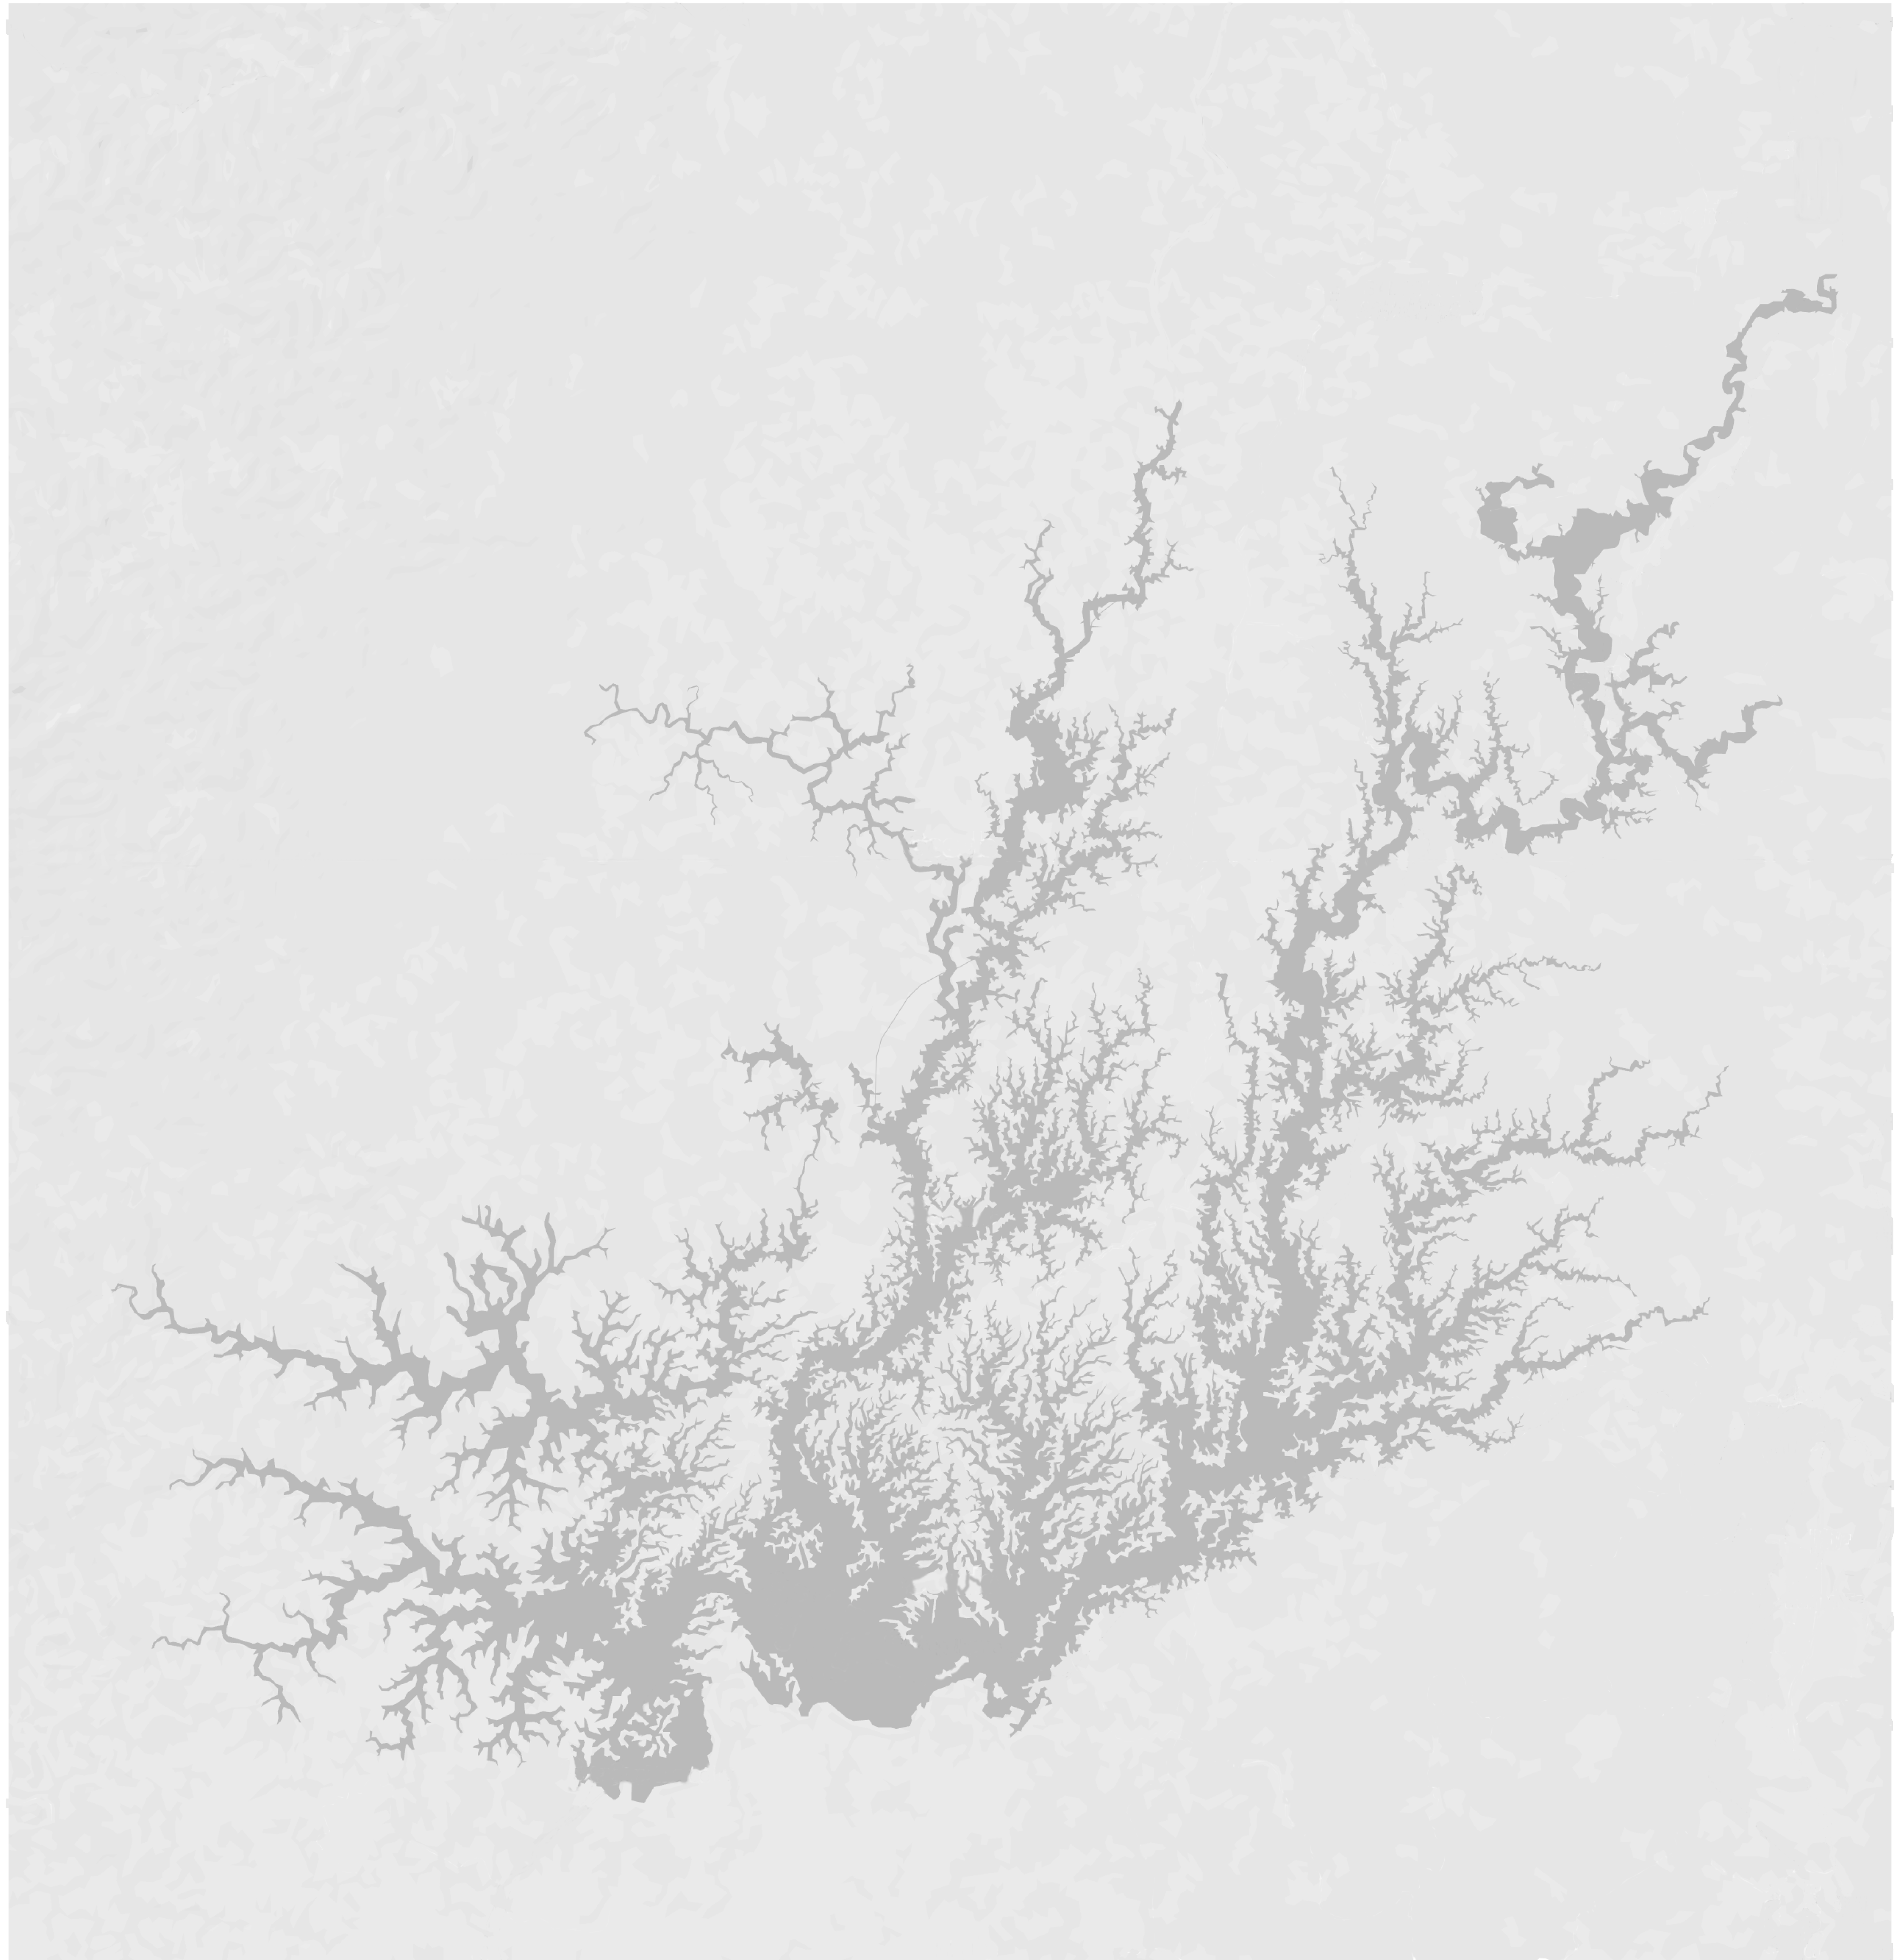

In [101]:
Image.open('jou.png').convert('L')

Yeah! We are in the right track, the previous function convert the 'full-color' version of the image to a 'B/W' version. But is not over yet. The image is not binarized. In fact, there are many values in the 'B/W' spectrum of this new image. In order to see this, we are going to obtain the values and place them in an array, then print some of them to verify that in fact is not binarized 

In [106]:
im = np.array(Image.open('jou.png').convert('L'))
x, y, z = (im[0, 0], im[609, 3769], im[1999, 2008])
print ((x, y, z))

(255, 186, 234)


The size of the matrix reveals the size of the image in pixels, the number of rows is the height and the number of columns is the width

In [112]:
print(len(im), len(im[0]))

4127 4000


Remember that in out 'B/W' scale from 0-255, bigger means whiter. A white pixel have a value of 255 and a black pixel a value of 0. The 186 value  is for the water dam. And because in the preprocessed image we must require that the fractal-like object be one color, then we can filter all the pixels that are more or less white that this tonality. In our particular case we only need to filter are more whiter than the water dam. If the pixel if whiter the new value will be 255 and the river will going to have a 0 value.

For practical reasons the new image will be reasized to a square matrix of 3800 rows and col


In [150]:
im = np.array(Image.open('jou.png').convert('L'))
im_bin2 =  (im > 192) * 255
im_bin = np.zeros((3800, 3800))
for i in range (0, 3800):
    for j in range(0, 3800):
        im_bin[i, j]=im_bin2[i, j]
Image.fromarray(np.uint8(im_bin)).save('daule1.png')


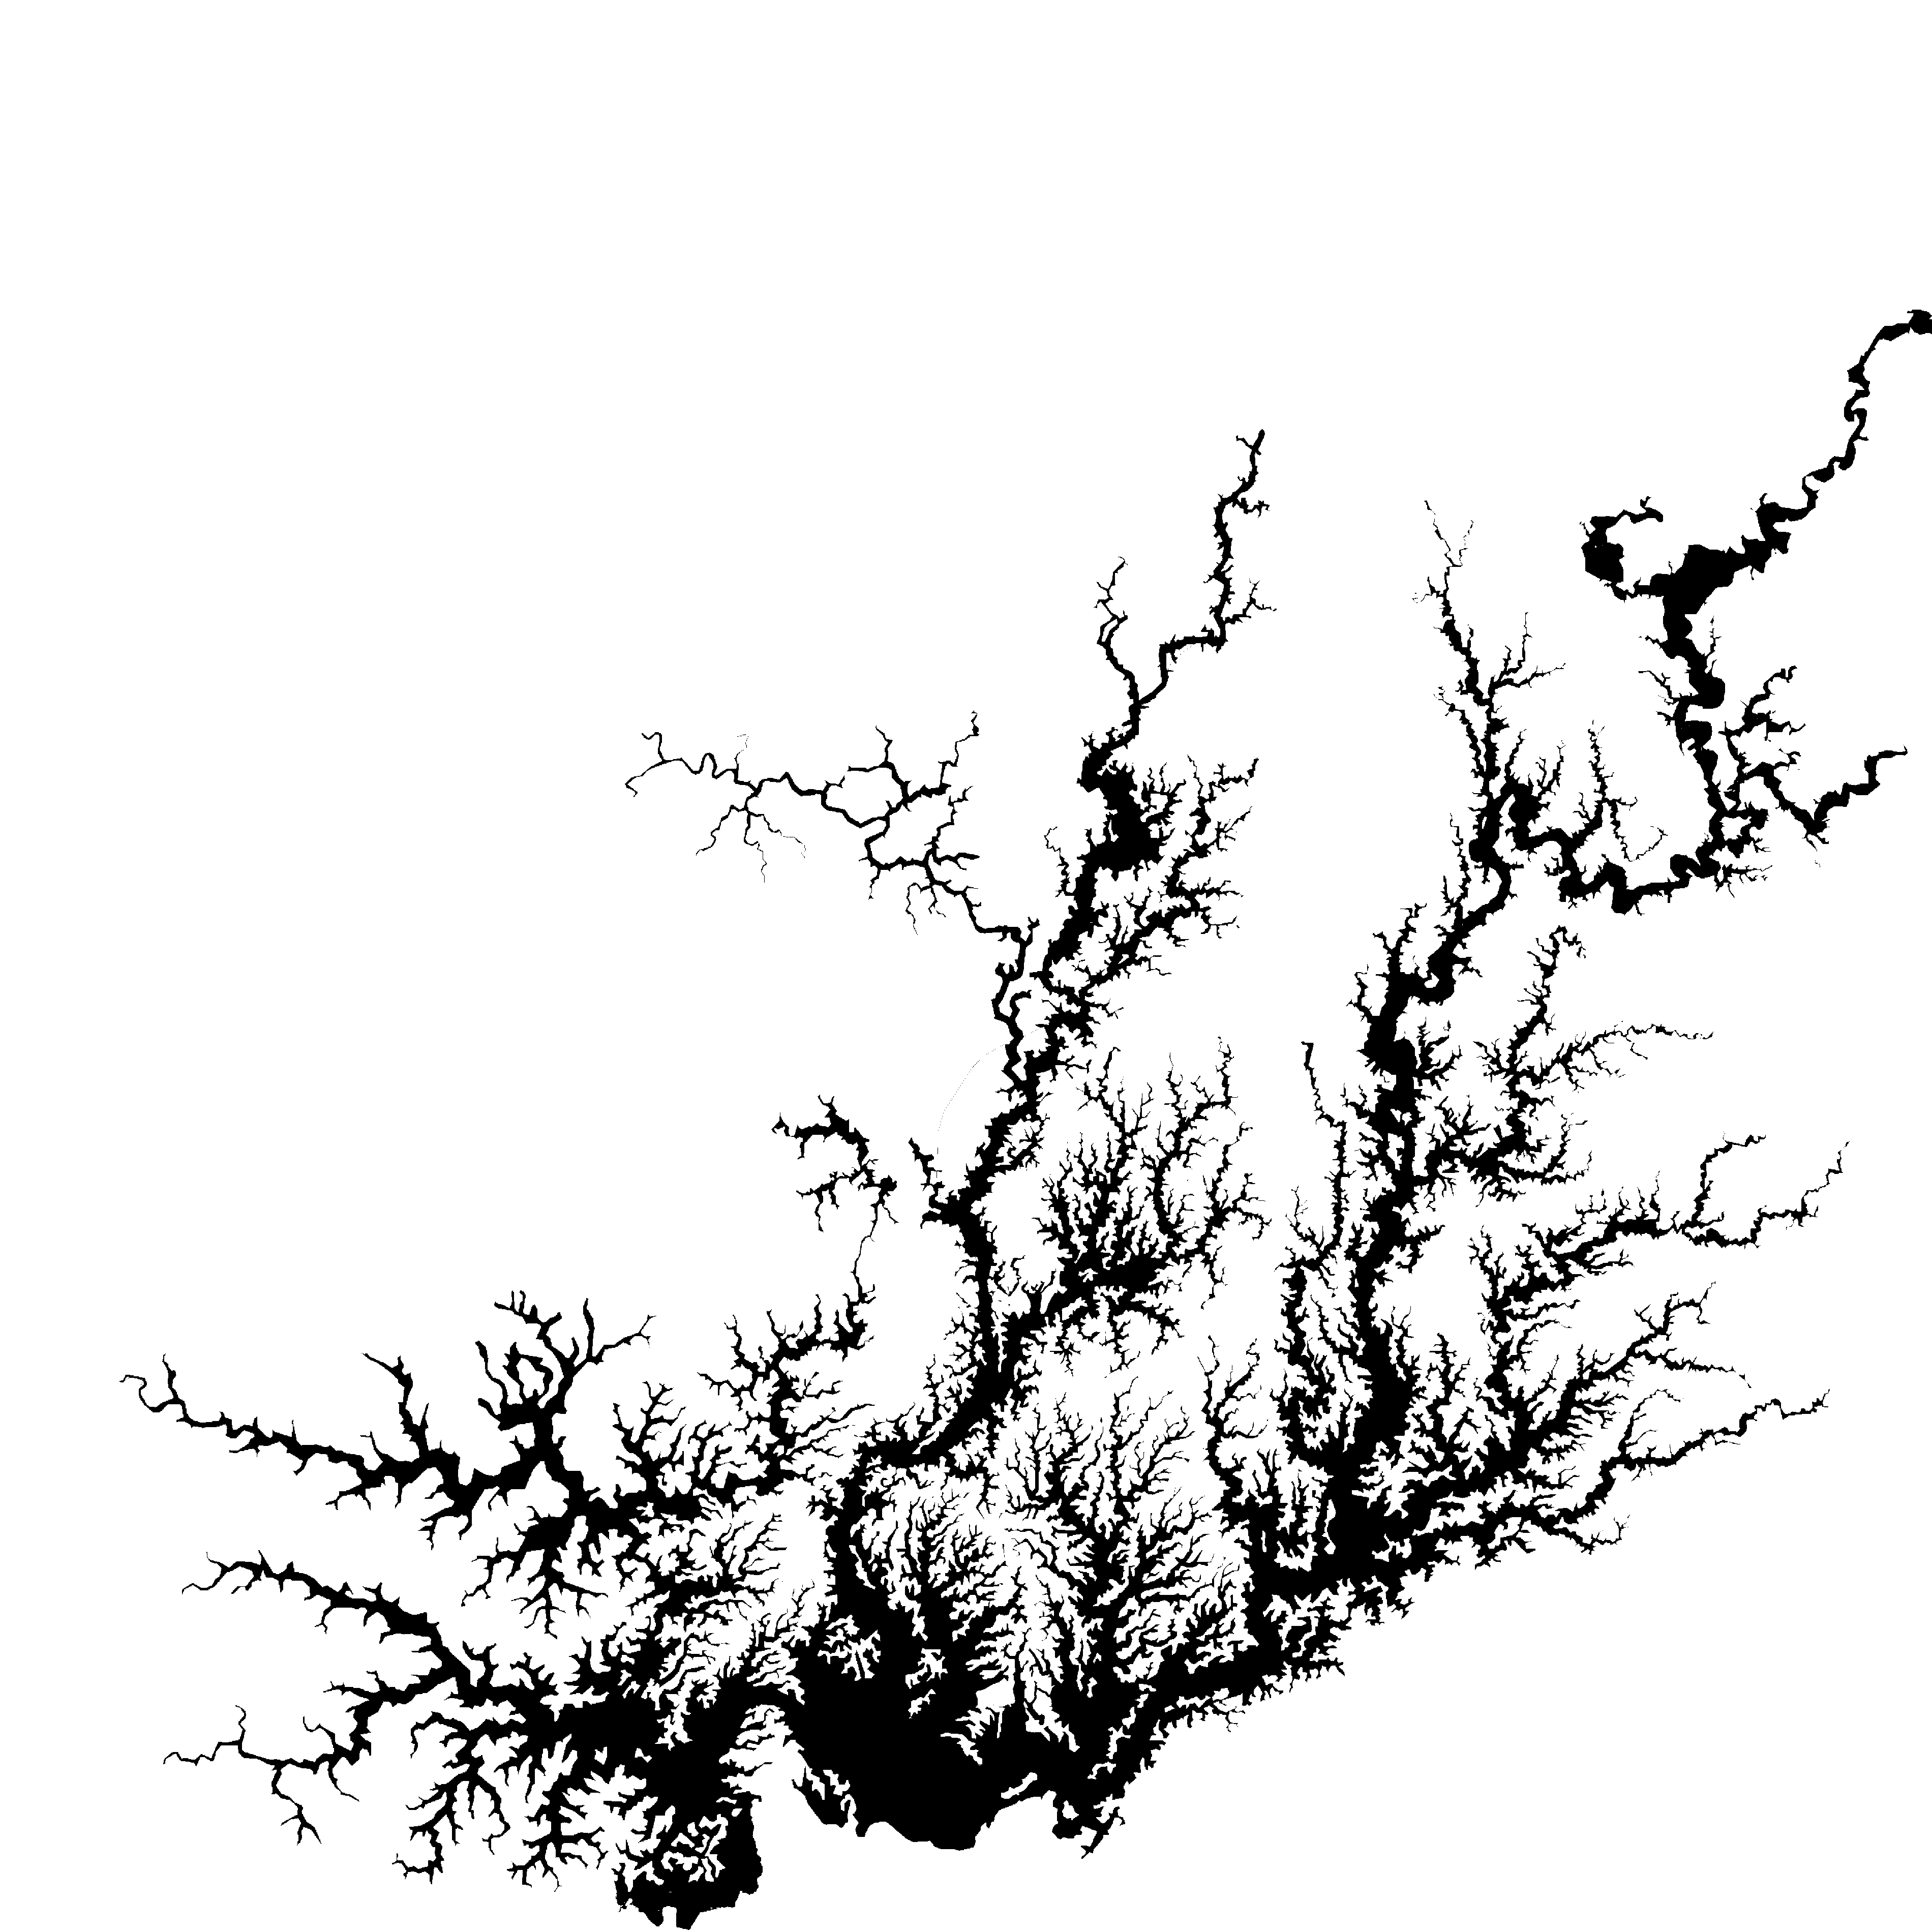

In [151]:
binarized = Image.open('daule1.png')
binarized

Beatiful... Now we are ready 

# Part 2: Box counting

Rowly, the box-counting method consist in separate in equal boxes (rectangular surfaces) a binarized image and count the number of boxes that have at least one 'black' pixel. The size of the box is crucial in the number of counted boxes.

Let's visualize this with two examples. 

### Example 1: 4 boxes

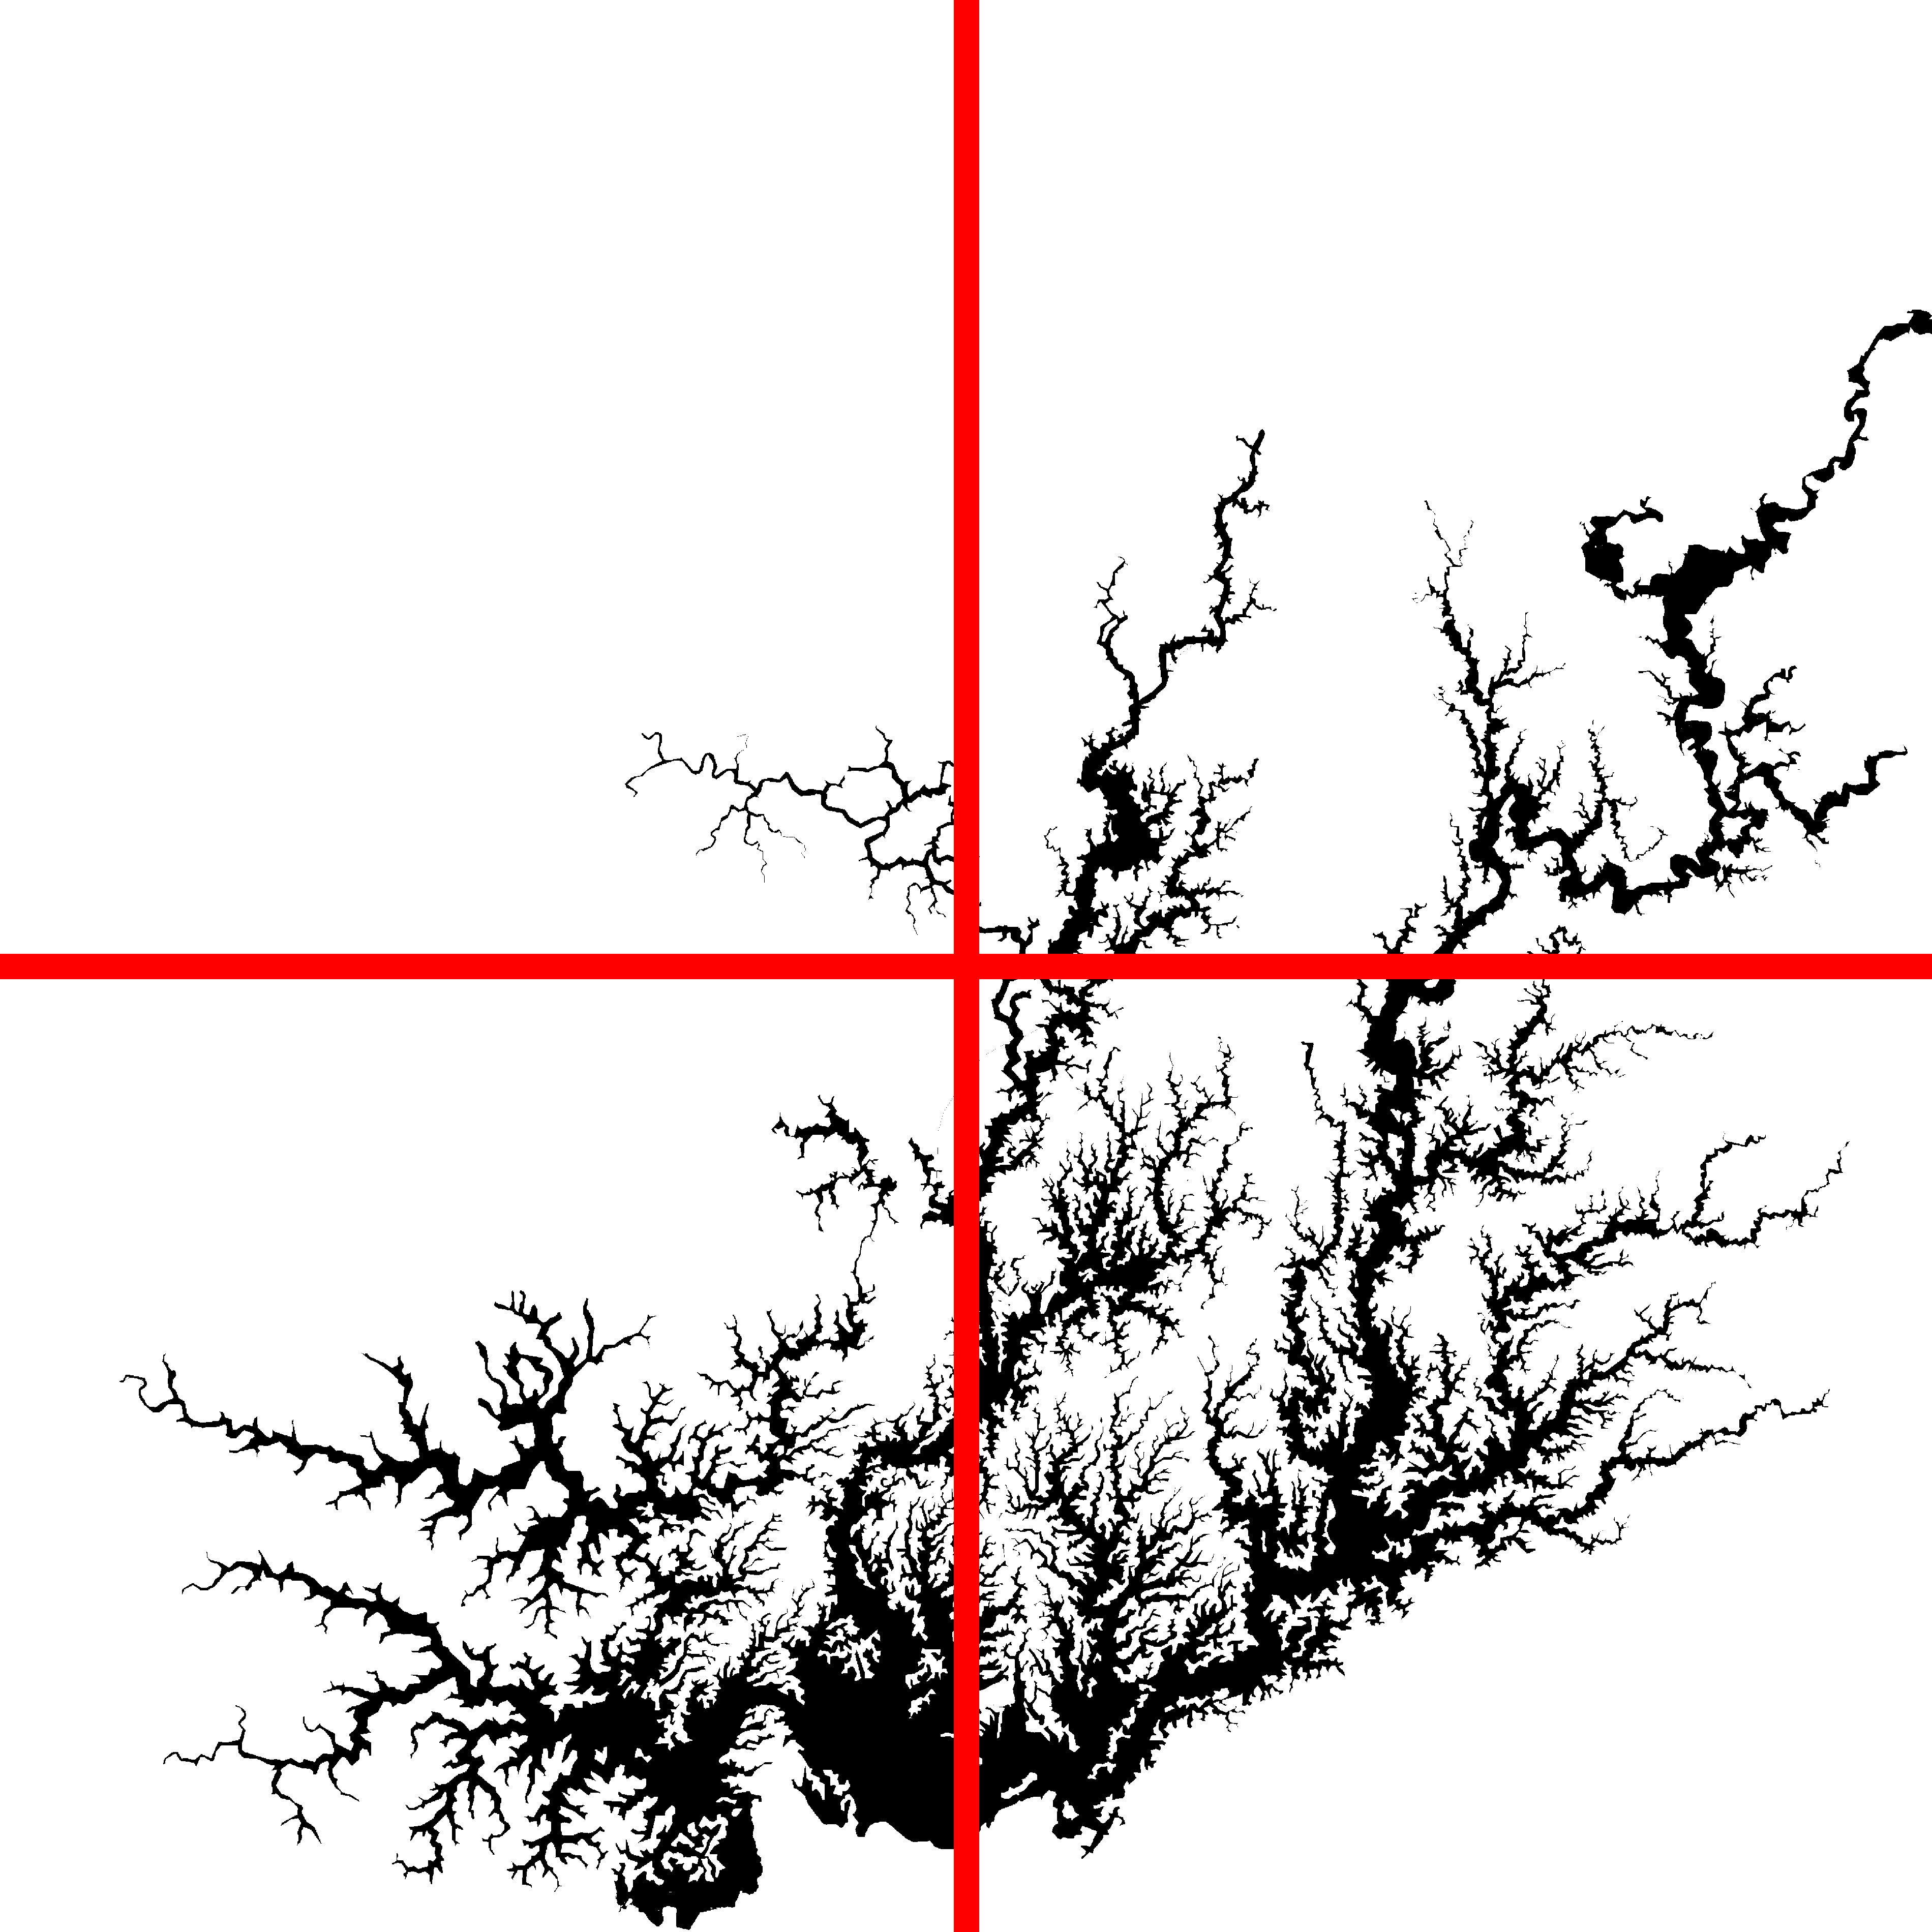

In [152]:
boxes4 = binarized.convert('RGB')
aux = ImageDraw.Draw(boxes4)
aux.line([(1900, 0), (1900, 3800)] , fill ='red', width = 50) 
aux.line([(0, 1900), (3800, 1900)] , fill ='red', width = 50) 
boxes4

In the 4 boxes we have 4 boxes with at least one black pixel

### Example 2: 16 boxes

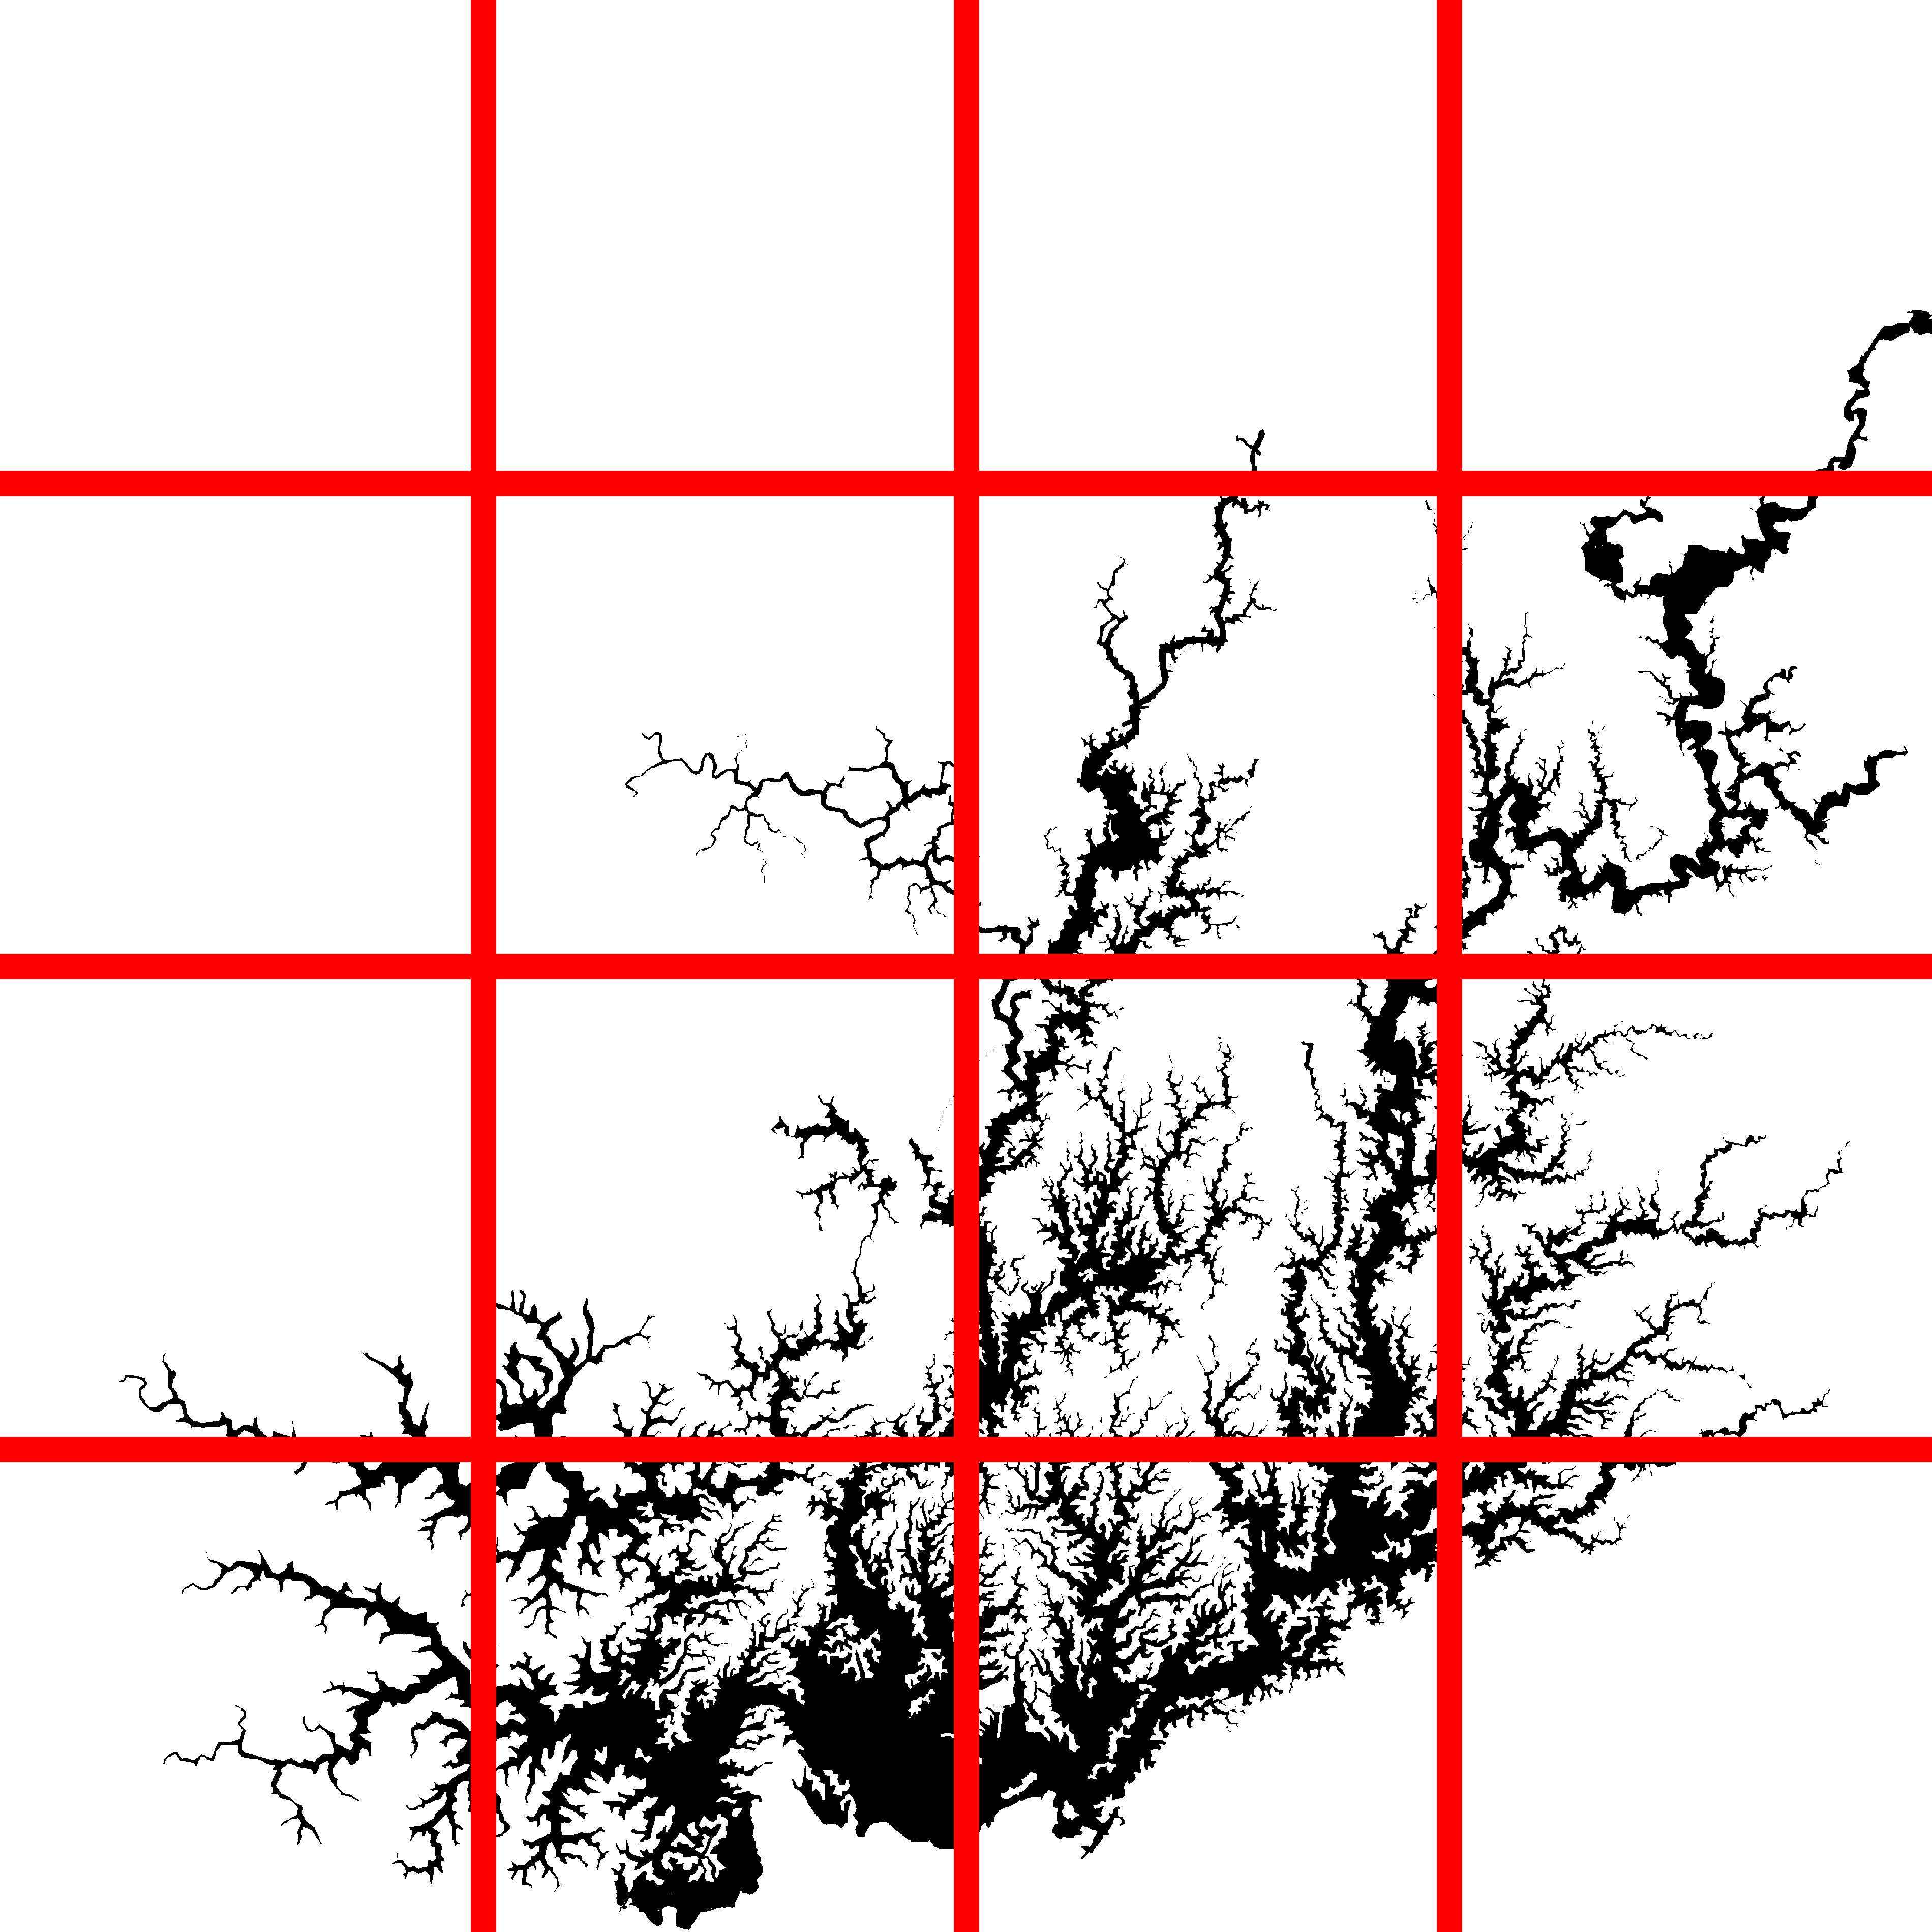

In [160]:
x = np.arange(950, 3800, 950)
boxes16 = binarized.convert('RGB')
aux = ImageDraw.Draw(boxes16)
for i in x: 
    aux.line([(i, 0), (i, 3800)] , fill ='red', width = 50)
for i in x: 
    aux.line([(0, i), (3800, i)] , fill ='red', width = 50) 
boxes16

In this case we have 14 boxes with at least one black pixel

## Part 3: The algorithm

The algorithm explains itself. We obtain the number of integer positive divisors of 3800 and put them in a list from the greatest to 1. After that we divide the image in $nxn$ boxes in wich $n$ is the divisor. Then we search in every box if exists a black pixel and count it. 

In [177]:
def Divisors(n) : 
    divisores = []
    # Note that this loop runs till square root 
    i = 1
    while i <= math.sqrt(n): 
          
        if (n % i == 0) : 
              
            # If divisors are equal, print only one 
            if (n / i == i) : 
                divisores.append(i) 
            else : 
                # Otherwise print both 
                divisores.append(i)
                divisores.append(n/i)
        i = i + 1
    return divisores

In [223]:
divisores = Divisors(3800)
divisores = np.sort(divisores)
divisores = divisores[::-1]
count=np.zeros(len(divisores))
for f in range(0, len(divisores)):
    for i in range(0, int(3800 / divisores[f])):
        for j in range(0,int(3800 / divisores[f])):
            counter=0
            for k in range(0, int(divisores[f])):
                for l in range(0, int(divisores[f])):
                    if(im_bin2[i * int(divisores[f]) + k, j * int(divisores[f]) + l]==0):
                        counter = counter + 1
            if(counter != 0):
                count[f] = count[f] + 1              

In the $count$ array we have the number of boxes with black pixels. We can visualize this with pandas.

In [232]:
df = pd.DataFrame(np.sort(Divisors(3800)), count)
df

0
1.0           1.0
4.0           2.0
13.0          4.0
19.0          5.0
39.0          8.0
61.0         10.0
175.0        19.0
188.0        20.0
274.0        25.0
556.0        38.0
610.0        40.0
888.0        50.0
1813.0       76.0
2671.0       95.0
2926.0      100.0
5919.0      152.0
8615.0      190.0
9455.0      200.0
26858.0     380.0
38613.0     475.0
84102.0     760.0
123237.0    950.0
422844.0   1900.0
1549351.0  3800.0

## Part 4: The fractal dimension

One way to calculate the fractal dimension of the analyzed object is find the slope of the linear regression of the $log_{10}$ plot of the number of boxes with black pixels and the divisors. Well, we have both data and a nice function of pylab that allows us to calculate the slope of the regression.

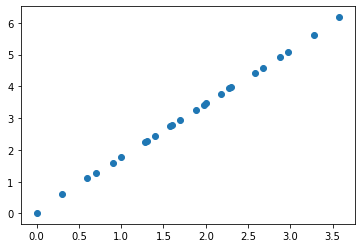

In [226]:
divisores = np.sort(Divisores(3800))
x = np.zeros(len(divisores))
for i in range(0, len(divisores)):
    x[i] = math.log10(divisores[i])
y = np.zeros(len(divisores))
for i in range(0, len(divisores)):
    y[i] = math.log10(count[i])
plt.scatter(x, y)
plt.show()


In [236]:
a, b = polyfit(x, y, 1)

print("The fractal dimension is: " + str(a))

The fractal dimension is: 1.6969256593127686
